In [1]:
import os
os.add_dll_directory(r'C:\ProgramData\anaconda3\envs\MedicalAI\Lib\site-packages\openslide-win64-20231011\bin') 

<AddedDllDirectory('C:\\ProgramData\\anaconda3\\envs\\MedicalAI\\Lib\\site-packages\\openslide-win64-20231011\\bin')>

In [2]:
import cv2
import numpy as np
import xml.etree.ElementTree as ET
from openslide import OpenSlide
import matplotlib.pyplot as plt

In [22]:
xml_file_path = r"G:\train_data\Breast1__he\slides\TCGA-A1-A0SM-01Z-00-DX1.xml"
slide_path = r"G:\train_data\Breast1__he\slides\TCGA-A1-A0SM-01Z-00-DX1.svs" 
mask_name = str(slide_path.split("\\")[-1])
slide = OpenSlide(slide_path)

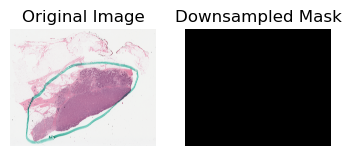

In [30]:
from skimage.transform import rescale, resize

with open(xml_file_path, 'r') as file:
    xml_content = file.read()

tree = ET.fromstring(xml_content)  # Assuming xml_content contains your XML data
annotation = tree.find('.//Annotation')

# Extract coordinates from XML
coordinates = [(float(coord.attrib['X']), float(coord.attrib['Y'])) for coord in annotation.findall('.//Coordinate')]

# Get slide dimensions
slide_width, slide_height = slide.dimensions

# Specify downsampling factor
mask_level = 6 #?
downsample_factor = float(2 ** mask_level)
im_read_level = slide.get_best_level_for_downsample(downsample_factor)
im_read_size = slide.level_dimensions[im_read_level]

# Read the downsampled image data from the specified ROI
downsampled_slide_width = int(slide_width / downsampling_factor)
downsampled_slide_height = int(slide_height / downsampling_factor)

img = slide.read_region((0, 0), im_read_level, im_read_size)

# Convert PIL Image to NumPy array
img_arr = np.array(img)[:, :, :3]

# Downsample the coordinates
downsampled_coordinates = [(coord[0] / downsampling_factor, coord[1] / downsampling_factor) for coord in coordinates]

# Create a binary mask
mask = np.zeros((downsampled_slide_height, downsampled_slide_width), dtype=np.uint8)

# Set pixels inside the downsampled coordinates to 1
for coord_x, coord_y in downsampled_coordinates:
    mask[int(coord_y): int(coord_y) + 1, int(coord_x): int(coord_x) + 1] = 1

# Upsample the mask to match the original image resolution
# upsampled_mask = resize(mask, (slide_height, slide_width), mode='constant', anti_aliasing=False)

# Display the original image, downsampled image, and the upsampled mask
plt.subplot(1, 3, 1)
plt.imshow(img_arr)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title("Downsampled Mask")
plt.axis('off')

"""
plt.subplot(1, 3, 3)
plt.imshow(upsampled_mask, cmap='gray')
plt.title("Upsampled Mask")
plt.axis('off')
"""

plt.show()

print(coordinates)
print(downsampled_coordinates)